# importing necessary librariess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## General data 

In [17]:
# Load the csv file
cf = pd.read_csv(r"C:\Users\Lenovo\Downloads\teleco  customer churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [33]:
# data size
cf.shape

(7043, 21)

In [15]:
# display the first few rows
cf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# display the last few rows
cf.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
# data type
type(cf)

pandas.core.frame.DataFrame

In [79]:
cf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
# display a summary of dataframe
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### handling missing values in 'TotalCharges'

In [21]:
cf["TotalCharges"] = cf["TotalCharges"].replace(" ", "0")
cf["TotalCharges"] = cf["TotalCharges"].astype(float)

In [23]:
# check for the duplicates rows in the data set
print(f"Number of duplicated rows : {cf.duplicated().sum()}")

Number of duplicated rows : 0


In [25]:
# check for missing value in  each columns
cf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Encode numerical variables

In [27]:
# convert 'SeniorCitizen' from numerical (1, 0) to ('yes', 'No)
def conv(values):
    if values == 1:
        return "Yes"
    else:
        return "No"

cf["SeniorCitizen"] = cf["SeniorCitizen"].apply(conv)

#### Encode categorial variables

In [29]:
# convert 'Churn' from categorial ('Yes', 'No') to (1, 0)
cf["Churn"] = cf["Churn"].map({ "Yes" : 1 , "No" : 0 })

#### descriptive statistics

In [31]:
cf.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


## Data Exploration

### Overview

 In this section, I conduct exploratory data analysis (EDA) to detect trends, patterns and coorelations inn the dataset. This analysis helps in understanding the underlying relationships within the data and identify any significiant trends.

In [35]:
cf.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


### Distribution of Churn

Churn
0    5174
1    1869
Name: count, dtype: int64


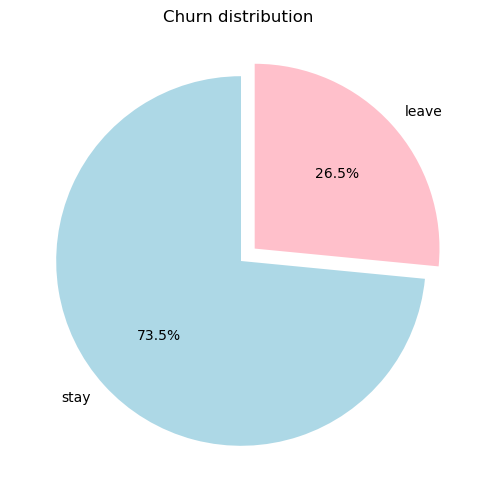

In [37]:
#distribution of churn
churn_counts = cf["Churn"].value_counts()
print(churn_counts)

# visualization churn distribution
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["stay", "leave"], autopct= "%1.1f%%", startangle = 90, explode=[0, 0.1], colors=["lightblue", "pink"])
plt.title("Churn distribution ")
plt.show()

### Gender :

In [39]:
# convert 'Gender' from categorial('Female','Male') to (1,0)
cf["gender"] = cf["gender"].map({"Male" : 1, "Female" : 0})

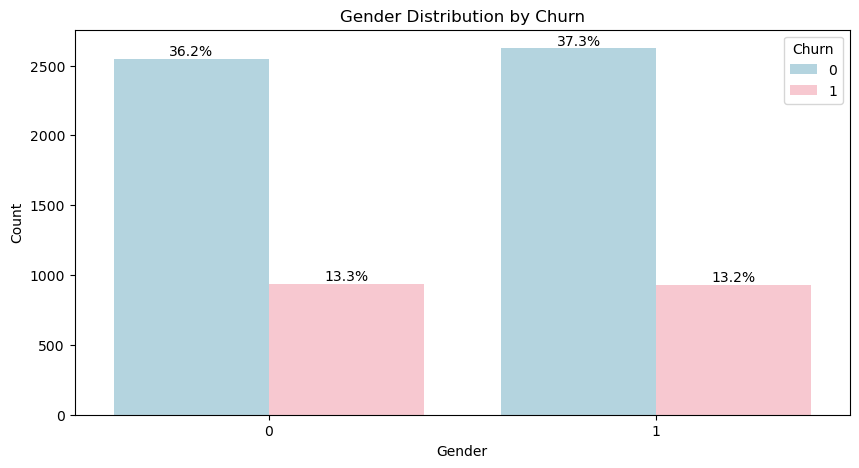

In [41]:
plt.figure(figsize=(10,5))
gender_plot = sns.countplot(data = cf , x ="gender", hue = "Churn", palette=["lightblue", "pink"])
plt.title("Gender Distribution by Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
gender_counts = cf["gender"].value_counts()
total_gender = gender_counts.sum()
for patch in gender_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height/total_gender) * 100
        gender_plot.annotate(f"{percentage:.1f}%", 
                             (patch.get_x() + patch.get_width() / 2, height),
                             ha = "center" , va = "bottom", fontsize = 10)

### Internet Services :

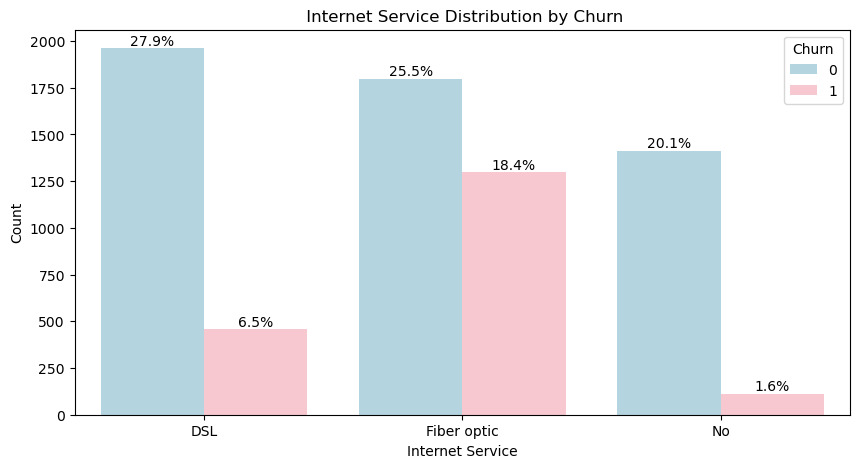

In [43]:
plt.figure(figsize= (10, 5))
Internet_plot = sns.countplot(data = cf, x = "InternetService" , hue = "Churn", palette=["lightblue", "pink"])
plt.title(" Internet Service Distribution by Churn")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.xticks(rotation = 0)
Internet_counts = cf["InternetService"].value_counts()
total_internet = Internet_counts.sum()
for patch in Internet_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height/total_internet) * 100
        Internet_plot.annotate(f"{percentage:.1f}%" ,
                               (patch.get_x() + patch.get_width() / 2 , height),
                               ha = "center", va = "bottom", fontsize = 10)
plt.show()

Internet service appears to influence Churn, with Fiber optic having a higher likelihood of leaving compared to DSL or No services.

### Senior Citizen :

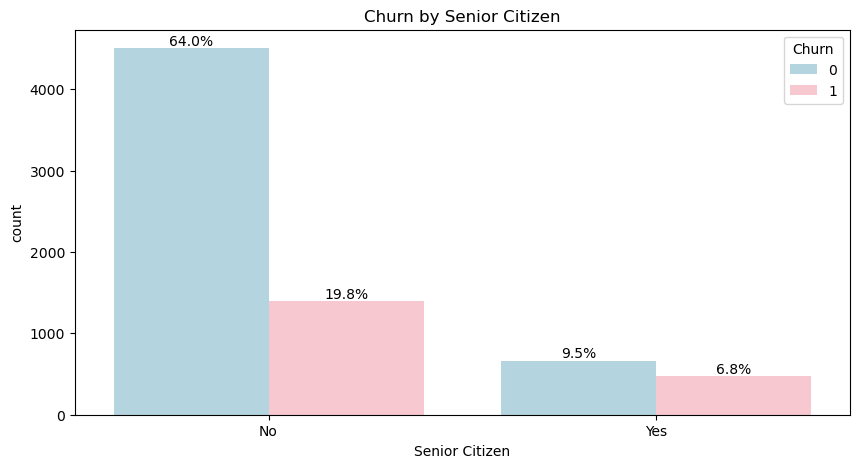

In [45]:
plt.figure(figsize=(10, 5))
senior_plot = sns.countplot(data = cf, x = "SeniorCitizen", hue = "Churn", palette = ["lightblue", "pink"])
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("count")
plt.xticks(rotation=0)
senior_count = cf["SeniorCitizen"].value_counts()
total_senior = senior_count.sum()
for patch in senior_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height/total_senior) *100
        senior_plot.annotate(f"{percentage:.1f}%",
                             (patch.get_x() + patch.get_width() / 2, height),
                             ha = "center", va = "bottom", fontsize=10)
plt.show()
                             


comparative a greater percentage of people in senior citizen have churned.

### Tenure :

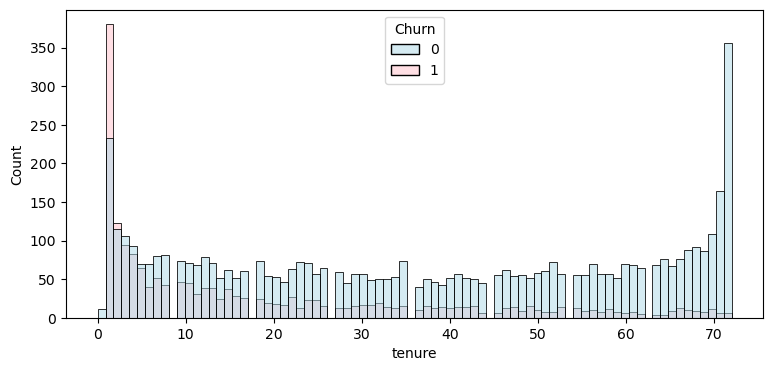

In [81]:
plt.figure(figsize = (9, 4))
sns.histplot(data = cf, x = "tenure", bins=80, hue = "Churn", palette=["lightblue", "pink"])
plt.show()

people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned.

### Contract :

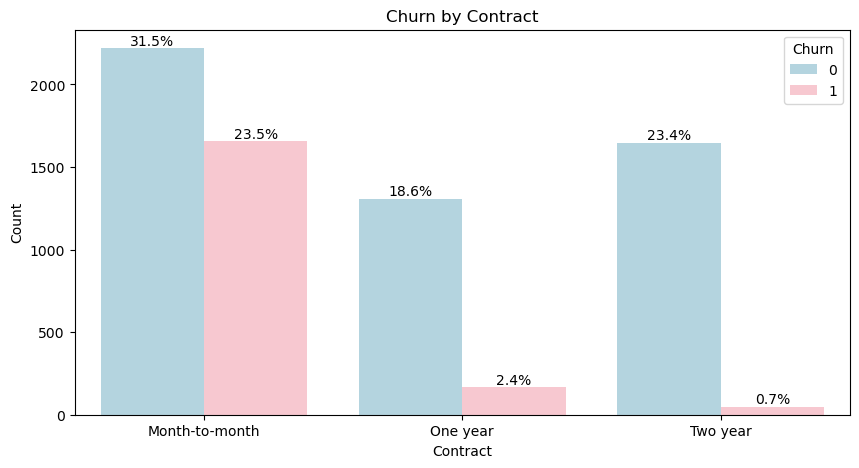

In [49]:
plt.figure(figsize=(10, 5))
contract_plot = sns.countplot(data = cf, x = "Contract", hue = "Churn", palette = ["lightblue", "pink"])
plt.title("Churn by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.xticks(rotation=0)
contract_count = cf["Contract"].value_counts()
total_contract = contract_count.sum()
for patch in contract_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height/total_senior) *100
        contract_plot.annotate(f"{percentage:.1f}%",
                             (patch.get_x() + patch.get_width() / 2, height),
                             ha = "center", va = "bottom", fontsize=10)
plt.show()

people who have month to month contract are likely to churn them from those who have 1 or 2 years of contract.

### Payment Method :

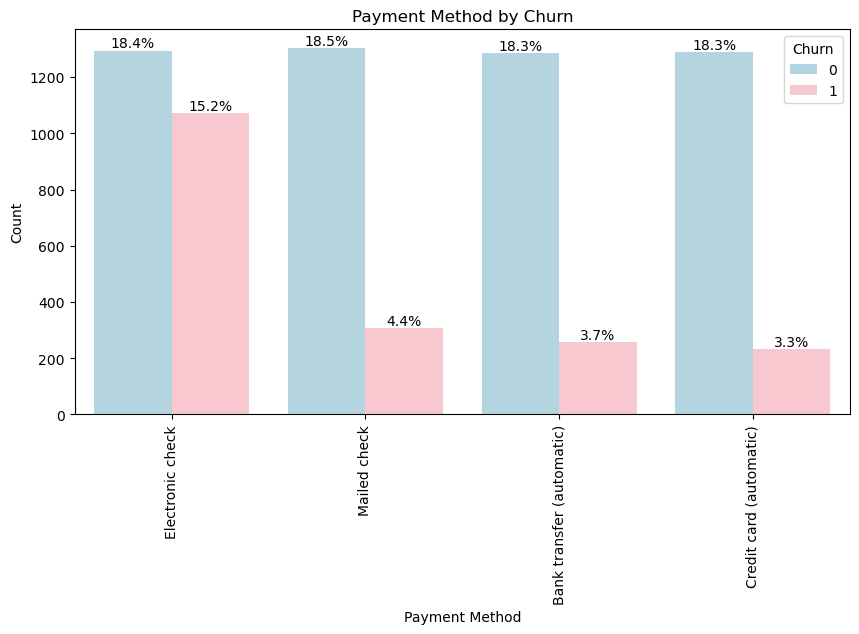

In [51]:
plt.figure(figsize= (10, 5))
pay_plot = sns.countplot(data =cf, x = "PaymentMethod", hue ="Churn", palette=["lightblue", "pink"])
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=90)
pay_counts = cf["PaymentMethod"].value_counts()
total_pay = pay_counts.sum()
for patch in pay_plot.patches:
    height = patch.get_height()
    if height > 0:
        percentage = (height/total_pay) *100
        pay_plot.annotate(f"{percentage:.1f}%" ,
        (patch.get_x() + patch.get_width() / 2, height),
        ha = "center", va = "bottom", fontsize = 10)
plt.show()

Customer is likely to churn when he is using electronic check as a payment method.

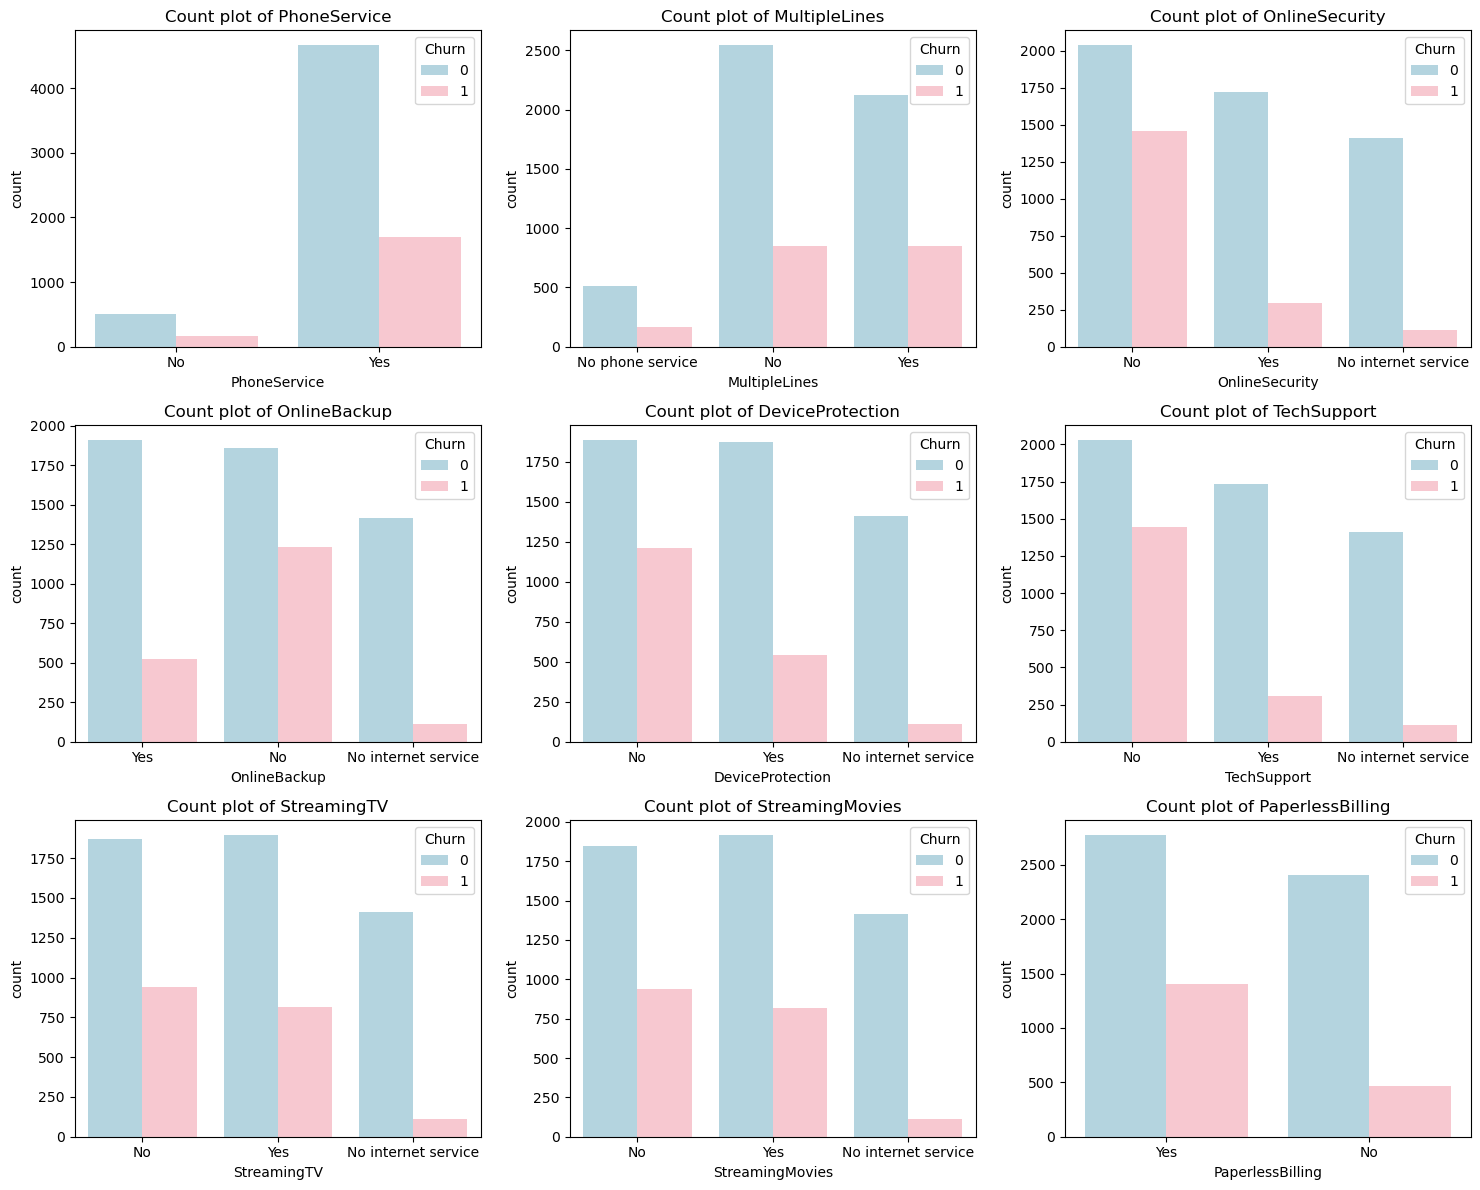

In [99]:
columns = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]

n_cols = 3 
n_rows = (len(columns) + n_cols -1) //n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows *4))

axes= axes.flatten()

for i,col in enumerate(columns):
     sns.countplot(x=col, data=cf,  ax=axes[i], hue = cf["Churn"], palette=["lightblue", "pink"])
     axes[i].set_title(f"Count plot of {col}")
     axes[i].set_xlabel(col)
     axes[i].set_ylabel("count")

for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()